- 필기체를 구분하는 분류 ANN
- 시계열을 예측하는 회귀 ANN

기존 스몰데이터로 인하여 은닉계층은 오직 하나 (가중치 최적화가 어려움)
- 스몰 데이터를 대신할 머신러닝 방법
    - **SVM** 데이터가 적을때 우수한 성능을 보임
        - 처리할 데이터양이 늘어나거나 비정형 데이터인 경우 복잡도가 높아져서 활용하기 어려움

In [1]:
# 가중치 학습 > 예측값의 목표값에 대한 오차를 역방향으로 되돌리면서 이루어지는  "오차역전파"
# 오차 역전파는 오차를 줄이는 "경사하강법"에서 유도
# "손실함수" 가중치에 따라 오차가 얼마나 커지너가 작아지는지 판단 (분류: cross_entropy, 회귀: MSE)

# 최적화 방법: Adam, Adagrad, RMSprop 사용
    ## Adam: 경사의 분산과 평균으로부터 파라미터를 업데이트하는 적응 알고리즘
    ## Adagrad: 밀집되지 않은 데이터에 적합하도록 경사 제곱을 통해 시간에 따라 학습률을 조정하는 적응 알고리즘
    ## RMSprop: 학습률이 급격히 떨어지지 않게 감쇠항을 추가한 적응 알고리즘

#### ANN 구현 방법
- 함수형 구현
    - ANN 모델을 직접 설계하는 인공지능 전문가에게 적합
- 객체 지향형 구현
    - 전문가가 만들어놓은 ANN을 사용하는 사용자에게 적합

#### ANN 모델링 
- 분산방식
    - 구조가 **복잡한** 경우에 적합
    
    ```python
    x = layers.Input(shape =())
    y = layers.Activation('relu')(layers.Dense(64))(x)
    model = models.Model(x, y)
    ```
    
- 연쇄방식 
    - 하나의 순서로 구성된 **간단한** 신경망의 구현에 적합
    
    ```python
    model = models.Sequential()
    model.add(layers.Dense())
    ```
    
- 혼합방식

---

```python
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
```

## ANN_MNIST

In [2]:
# layers: 레이어 쌓을때
# models: models.Model 객체에서 compile(), fit(), predict(), evaluate()등의 딥러닝 처리 함수 제공
from keras import layers, models

In [3]:
# 분산 방식 모델링을 포함하는 함수형 구현
def ANN_model_func(Nin, Nh, Nout):
    x = layers.Input(shape = (Nin,))
    h = layers.Activation('relu')(layers.Dense(Nh)(x))
    y = layers.Activation('softmax')(layers.Dense(Nout)(x))
    model = models.Model(x, y)
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [4]:
# 연쇄 방식 모델링을 포함하는 함수형 구현
def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh, activation=  'relu', input_shape = (Nin, )))
    model.add(layers.Dense(Nout, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy',optimizer = 'adam', metrics = ['accuracy'])
    return model

In [5]:
# 분산 방식 모델링을 포함하는 객체 지향형 구현
class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')
        
        x = layers.Input(shape = (Nin, ))
        h = relu(hidden(x))
        y = softmax(output(h))
        
        super().__init__(x, y)
        self.compile(loss  = 'categorical_crossentropy',  optimizer = 'adam', metrics = ['accuracy'])

In [6]:
# 연쇄 방식 모델링을 포함하는 객체 지향형 구현
class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        self.add(layers.Dense(Nh, activation = 'relu', input_shape = (Nin,)))
        self.add(layers.Dense(Nout, activation= 'softmax'))
        self.compile(loss  = 'categorical_crossentropy',  optimizer = 'adam', metrics = ['accuracy'])

In [7]:
# Data Load
import numpy as np
from keras import datasets # Mnist
from keras.utils import np_utils # to_categorical

In [8]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
    
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    
    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W*H)
    X_test = X_test.reshape(-1, W*H)
    
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    return (X_train, y_train), (X_test, y_test)

In [9]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc = 0)
    
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc = 0)

In [10]:
#분류  ANN 학습 및 성능 분석
def main():
    Nin =784
    Nh = 100
    number_of_class = 10
    Nout = number_of_class
    
    model = ANN_seq_class(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()
    
    #####################################
    # Training
    #####################################
    
    history = model.fit(X_train, Y_train, epochs = 10, batch_size = 100, validation_split = 0.2)
    performance_test = model.evaluate(X_test, Y_test, batch_size = 100)
    print("Test Loss and Accuracy -> ", performance_test)
    
    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()

Epoch 1/10
480/480 [==============================] - 2s 4ms/step - loss: 0.6683 - accuracy: 0.8148 - val_loss: 0.2314 - val_accuracy: 0.9327
Epoch 2/10
480/480 [==============================] - 1s 1ms/step - loss: 0.2051 - accuracy: 0.9427 - val_loss: 0.1617 - val_accuracy: 0.9545
Epoch 3/10
480/480 [==============================] - 1s 1ms/step - loss: 0.1470 - accuracy: 0.9572 - val_loss: 0.1355 - val_accuracy: 0.9616
Epoch 4/10
480/480 [==============================] - 1s 2ms/step - loss: 0.1093 - accuracy: 0.9693 - val_loss: 0.1326 - val_accuracy: 0.9607
Epoch 5/10
480/480 [==============================] - 1s 1ms/step - loss: 0.0879 - accuracy: 0.9747 - val_loss: 0.1061 - val_accuracy: 0.9687
Epoch 6/10
480/480 [==============================] - 1s 1ms/step - loss: 0.0739 - accuracy: 0.9786 - val_loss: 0.1034 - val_accuracy: 0.9694
Epoch 7/10
480/480 [==============================] - 1s 2ms/step - loss: 0.0595 - accuracy: 0.9838 - val_loss: 0.1032 - val_accuracy: 0.9682
Epoch 

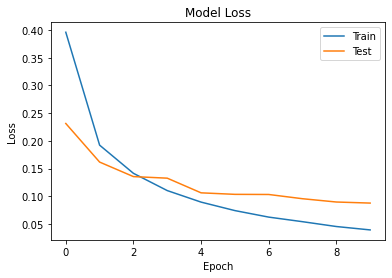

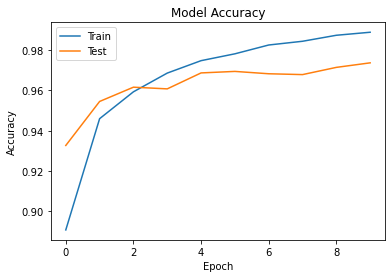

In [11]:
if __name__  == '__main__':
    main()

### 회귀 ANN

In [12]:
from keras import layers, models

In [13]:
class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        
        # connect network elements
        x = layers.Input(shape = (Nin,))
        h = relu(hidden(x))
        y = output(h)
        
        super.__init__(x, y)
        
        self.compile(loss = 'mse', optimizer = 'sgd')

In [14]:
#학습과 평가용 데이터 불러오기
from keras import datasets
from sklearn import preprocessing

def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return (X_train, y_train), (X_test, y_test)

In [15]:
#회귀 ANN학습 결과 그래프 구현
import matplotlib.pyplot as plt
from keraspp.skeras import plot_loss

ModuleNotFoundError: No module named 'keraspp'

In [16]:
!pip install keraspp

ERROR: Could not find a version that satisfies the requirement keraspp (from versions: none)
ERROR: No matching distribution found for keraspp


In [17]:
#회귀 ANN 학습 및 성능 분석
def main():
    Nin = 13
    Nh = 5
    Nout = 1
    
    model = ANN(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()
    
    history = model.fit(X_train, y_train, epochs = 100, batch_size = 100, validation_split  = 0.2, verbose = 2)
    
    performance_test = model.evaluate(X_test, y_test, batch_size= 100)
    print("\nTest Loss -> {:.2f}".format(performance_test))
    
    plot_loss(history)
    plt.show()

In [21]:
if __name__ == "__main__":
    main()

TypeError: descriptor '__init__' requires a 'super' object but received a 'KerasTensor'